In [2]:
import csv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 15]
from tqdm import tqdm_notebook
import random
import numpy as np
from time import time

In [3]:
def read_points(dataset_name, y_col_number):
    x = []
    y = []
    with open (dataset_name, 'r') as fin:
        csvReader = csv.reader(fin, delimiter=',')
        for row in csvReader:
            if csvReader.line_num != 1:
                float_row = []
                for i in range(0, len(row)):
                    if i != y_col_number:
                        float_row.append(float(row[i]))
                x.append(float_row)
                y.append(float(row[y_col_number]))
    return x, y

In [4]:
def path_length(x):
    dist = 0
    for i in range(1, len(x)):
        dist += np.abs(x[i][0] - x[i - 1][0]) + np.abs(x[i][1] - x[i - 1][1])
    return dist

In [5]:
def hill_climb():
    x, _ = read_points("../Datasets/tsp.csv", 0)
    min_d = None
    good_path = None
    random.seed(time())
    np.random.shuffle(x)
    while(True):
        best_path = []
        best_dist = -1
        dist = path_length(x)
        for i in range(len(x)):
            for j in range(i + 1, len(x)):
                new_x = x[:]
                tmp = new_x[i]
                new_x[i] = new_x[j]
                new_x[j] = tmp
                new_dist = path_length(new_x)
                if new_dist < dist and (best_dist == -1 or new_dist < best_dist):
                    best_dist = new_dist
                    best_path = new_x
        if len(best_path) != 0:
            x = best_path
        else:
            break
        
    print("Length = " + str(path_length(x)))       
    l1_path = []
    for i in range(1, len(x)):
        l1_path.append(x[i - 1])
        l1_path.append([x[i - 1][0], x[i][1]])
    l1_path.append(x[len(x) - 1])
    plt.plot(np.array(l1_path)[:,0], np.array(l1_path)[:,1])
    plt.show()

Length = 12450.0


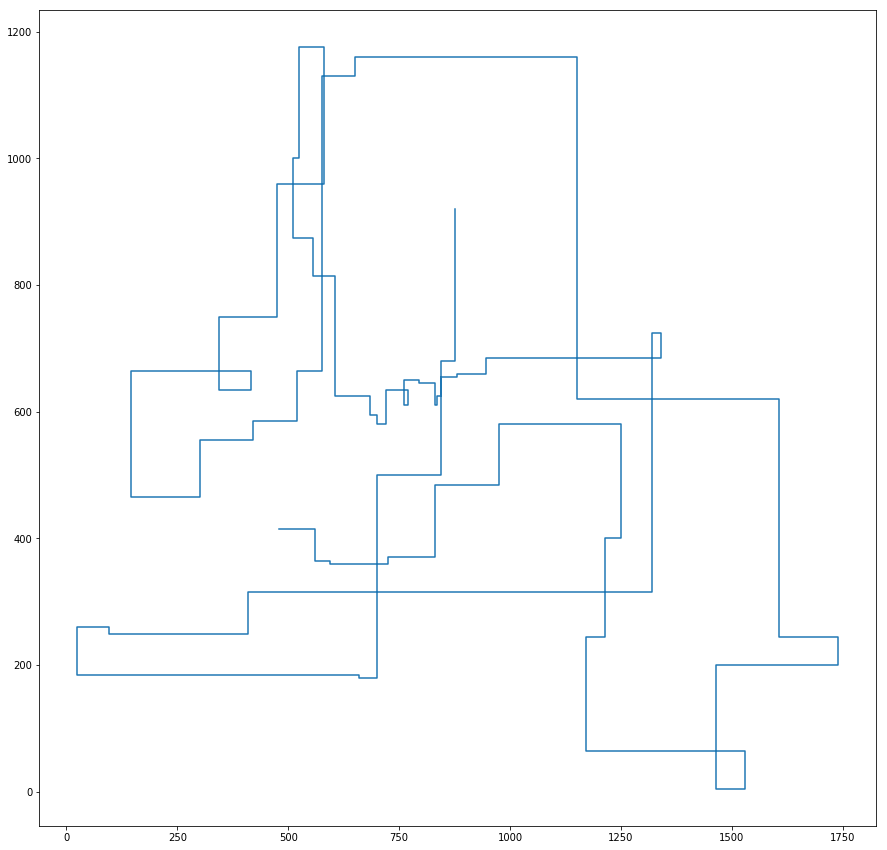

In [6]:
hill_climb()